# Data Science
## Superhero analysis --> Statistics and distributions

In [95]:
import os

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Daten importieren

Die Daten können mit Pandas eingelesen werden mit dem Befehl `pd.read_csv()`.
In vielen Fällen funktioniert dies nicht direkt. Meistens liegt es dann an einem der folgenden Punkte:
- `FileNotFoundError` --> Entweder der Dateiname ist falsch geschrieben, oder der Pfad stimmt nicht.
- `UnicodeDecodeError` --> Entweder der Dateiname (+Pfad) wurden mit unerlaubten Zeichen geschrieben (bei Windows z.B. muss oft "//" statt "/" verwendet werden), oder die Datei selbst ist nicht im erwarteten "Encoding" gespeichert. Für letzterers gibt es zwei Möglichkeiten: (1) Die Datei mit einem Editor umwandeln. Oder (2) den parameter `encoding=...` entsprechend setzten.  
Es gibt sehr viele mögliche Encodings ([siehe Link](https://docs.python.org/3/library/codecs.html#standard-encodings)), aber am häufigsten sind "utf-8" (der Standard), "ANSI" (auf mac: "iso-8859-1" oder "ISO8859") oder "ASCII".
- `ParserError` --> Bedeutet meistens, dass der "delimiter" also das Trennzeichen falsch angegeben ist. Am besten die Datei kurz mit einem Editor öffnen und nachschauen und dann entsprechend setzten mit `delimiter="..."`. Typische Trennzeichen sind `","`, `";"`, `"\t"` (tab).
- Falls die Datei nicht mit den gewünschten Spaltennamen beginnt, kann dies durch das Angeben der zu überspringenden Zeilen korrigiert werden --> `skiprows=1` (1, 2, 3,... je nach Fall).

In [96]:
path_data = "data"
file_marvel = "marvel-wikia-data_json.json"
file_dc = "dc-wikia-data_json.json"

In [97]:
data_marvel = pd.read_json(os.path.join(path_data, file_marvel))
data_marvel.head()

,align,alive,appearances,eye,first appearance,gsm,hair,id,name,page_id,sex,urlslug,year
0,good characters,living characters,4043.0,hazel eyes,aug-62,None,brown hair,secret identity,spider-man (peter parker),1678,male characters,\/spider-man_(peter_parker),1962.0
1,good characters,living characters,3360.0,blue eyes,mar-41,None,white hair,public identity,captain america (steven rogers),7139,male characters,\/captain_america_(steven_rogers),1941.0
2,neutral characters,living characters,3061.0,blue eyes,oct-74,None,black hair,public identity,"wolverine (james \""logan\"" howlett)",64786,male characters,\/wolverine_(james_%22logan%22_howlett),1974.0
3,good characters,living characters,2961.0,blue eyes,mar-63,None,black hair,public identity,"iron man (anthony \""tony\"" stark)",1868,male characters,\/iron_man_(anthony_%22tony%22_stark),1963.0
4,good characters,living characters,2258.0,blue eyes,nov-50,None,blond hair,no dual identity,thor (thor odinson),2460,male characters,\/thor_(thor_odinson),1950.0


In [98]:
data_dc = pd.read_json(os.path.join(path_data, file_dc))
data_dc.head()

,align,alive,appearances,eye,first appearance,gsm,hair,id,name,page_id,sex,urlslug,year
0,good characters,living characters,3093.0,blue eyes,"1939, may",None,black hair,secret identity,batman (bruce wayne),1422,male characters,\/wiki\/batman_(bruce_wayne),1939.0
1,good characters,living characters,2496.0,blue eyes,"1986, october",None,black hair,secret identity,superman (clark kent),23387,male characters,\/wiki\/superman_(clark_kent),1986.0
2,good characters,living characters,1565.0,brown eyes,"1959, october",None,brown hair,secret identity,green lantern (hal jordan),1458,male characters,\/wiki\/green_lantern_(hal_jordan),1959.0
3,good characters,living characters,1316.0,brown eyes,"1987, february",None,white hair,public identity,james gordon (new earth),1659,male characters,\/wiki\/james_gordon_(new_earth),1987.0
4,good characters,living characters,1237.0,blue eyes,"1940, april",None,black hair,secret identity,richard grayson (new earth),1576,male characters,\/wiki\/richard_grayson_(new_earth),1940.0


# (1) Erste Datenerkundung
- Wie viele und welche Spalten gibt es? --> `data.columns`
- Gibt es fehlende Werte? --> `.info()`
- erster Überblich und: Gibt es merkwürdige Einträge --> `.describe()`

### Ausfüllen:
- Anzahl der Spalten: 13
- Gibt es fehlende Werte und wenn ja, welche? ...

In [99]:
print(data_marvel.columns)
print(data_dc.columns)

Index(['align', 'alive', 'appearances', 'eye', 'first appearance', 'gsm',
       'hair', 'id', 'name', 'page_id', 'sex', 'urlslug', 'year'],
      dtype='object')
Index(['align', 'alive', 'appearances', 'eye', 'first appearance', 'gsm',
       'hair', 'id', 'name', 'page_id', 'sex', 'urlslug', 'year'],
      dtype='object')


In [100]:
data_marvel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16376 entries, 0 to 16375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   align             13564 non-null  object 
 1   alive             16373 non-null  object 
 2   appearances       15280 non-null  float64
 3   eye               6609 non-null   object 
 4   first appearance  15561 non-null  object 
 5   gsm               90 non-null     object 
 6   hair              12112 non-null  object 
 7   id                12606 non-null  object 
 8   name              16376 non-null  object 
 9   page_id           16376 non-null  int64  
 10  sex               15522 non-null  object 
 11  urlslug           16376 non-null  object 
 12  year              15561 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 1.6+ MB


In [101]:
data_dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6896 entries, 0 to 6895
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   align             6295 non-null   object 
 1   alive             6893 non-null   object 
 2   appearances       6541 non-null   float64
 3   eye               3268 non-null   object 
 4   first appearance  6827 non-null   object 
 5   gsm               64 non-null     object 
 6   hair              4622 non-null   object 
 7   id                4883 non-null   object 
 8   name              6896 non-null   object 
 9   page_id           6896 non-null   int64  
 10  sex               6771 non-null   object 
 11  urlslug           6896 non-null   object 
 12  year              6827 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 700.5+ KB


In [102]:
data_marvel.describe()

,appearances,page_id,year
count,15280.000000,16376.000000,15561.000000
mean,17.033377,300232.082377,1984.951803
std,96.372959,253460.403399,19.663571
min,1.000000,1025.000000,1939.000000
25%,1.000000,28309.500000,1974.000000
50%,3.000000,282578.000000,1990.000000
75%,8.000000,509077.000000,2000.000000
max,4043.000000,755278.000000,2013.000000


In [103]:
data_dc.describe()

,appearances,page_id,year
count,6541.000000,6896.000000,6827.000000
mean,23.625134,147441.209252,1989.766662
std,87.378509,108388.631149,16.824194
min,1.000000,1380.000000,1935.000000
25%,2.000000,44105.500000,1983.000000
50%,6.000000,141267.000000,1992.000000
75%,15.000000,213203.000000,2003.000000
max,3093.000000,404010.000000,2013.000000


In [104]:
#Spalte auswaehlen
#data_marvel["gsm"] oder...
data_marvel.gsm

0        None
1        None
2        None
3        None
4        None
         ... 
16371    None
16372    None
16373    None
16374    None
16375    None
Name: gsm, Length: 16376, dtype: object

In [105]:
# leere Eintraege in col loeschen
data_marvel.gsm.dropna()

28         bisexual characters
42         bisexual characters
45         bisexual characters
61         bisexual characters
71               transvestites
                 ...          
15528    homosexual characters
16041    homosexual characters
16144    homosexual characters
16363    homosexual characters
16367    homosexual characters
Name: gsm, Length: 90, dtype: object

In [106]:
#oder mit Maske -> alle Spalten anzeigen die einen Wert haben (komplexer aber man kann logik verschachteln)
mask = data_marvel.gsm.values != None
data_marvel[mask].gsm

28         bisexual characters
42         bisexual characters
45         bisexual characters
61         bisexual characters
71               transvestites
                 ...          
15528    homosexual characters
16041    homosexual characters
16144    homosexual characters
16363    homosexual characters
16367    homosexual characters
Name: gsm, Length: 90, dtype: object

# Preprocessing

### 1. Daten entfernen? Antwort: Alle Spalten die uns nicht interessieren.
### 2. Daten ändern/anpassen? A: Namen sind nicht gut formatiert

In [107]:
if "urlslug" in data_marvel:
    data_marvel = data_marvel.drop('urlslug',axis=1)

In [108]:
data_marvel.head()

,align,alive,appearances,eye,first appearance,gsm,hair,id,name,page_id,sex,year
0,good characters,living characters,4043.0,hazel eyes,aug-62,None,brown hair,secret identity,spider-man (peter parker),1678,male characters,1962.0
1,good characters,living characters,3360.0,blue eyes,mar-41,None,white hair,public identity,captain america (steven rogers),7139,male characters,1941.0
2,neutral characters,living characters,3061.0,blue eyes,oct-74,None,black hair,public identity,"wolverine (james \""logan\"" howlett)",64786,male characters,1974.0
3,good characters,living characters,2961.0,blue eyes,mar-63,None,black hair,public identity,"iron man (anthony \""tony\"" stark)",1868,male characters,1963.0
4,good characters,living characters,2258.0,blue eyes,nov-50,None,blond hair,no dual identity,thor (thor odinson),2460,male characters,1950.0


### Daten entfernen oder nicht?
Im Zweifel, und solange die Daten technisch nicht "stören", müssen Daten erstmal nicht entfernt werden.
Es ist trotzdem OK für die Übersichtlichkeit oder das schnellere Bearbeiten von Daten, den Datensatz erstmal künstlich zu reduzieren.

(muss hier erstmal nicht gemacht werden)

In [109]:
len(data_marvel["name"].unique())

16375

In [110]:
data_marvel["name"]

0                  spider-man (peter parker)
1            captain america (steven rogers)
2        wolverine (james \"logan\" howlett)
3          iron man (anthony \"tony\" stark)
4                        thor (thor odinson)
                        ...                 
16371                     ru'ach (earth-616)
16372        thane (thanos' son) (earth-616)
16373          tinkerer (skrull) (earth-616)
16374         tk421 (spiderling) (earth-616)
16375                  yologarch (earth-616)
Name: name, Length: 16376, dtype: object

### Daten ändern?
Oft liegen die Daten in Formaten vor, die uns die Analyse erschweren. Hier z.B. die Namensfelder die deutlich mehr Information als nur den Superheldennamen enthalten. In solchen Fällen versuchen wir oft, die Daten umzuformen

### Aufgabe: 
- "Name" Spalte sinnvoll umformen
- Den Namen als "name" und den echten Namen als "real_name" hinzufügen


Tipp: Bei Pandas gibt es die möglichkeit eine Spalte mit Strings über `.str` mit den üblichen String-Methoden zu bearbeiten. Also z.B. `.str.split()` oder `.str.replace()`.
Dazu macht es oft Sinn hier auch `expand=True` mit anzugeben, so dass die resultierenden Werte in jeweils eigene Spalten gegeben werden.

In [111]:
new_columns = data_marvel['name'].str.split(" \(", expand=True)
new_columns

,0,1,2,3
0,spider-man,peter parker),None,None
1,captain america,steven rogers),None,None
2,wolverine,"james \""logan\"" howlett)",None,None
3,iron man,"anthony \""tony\"" stark)",None,None
4,thor,thor odinson),None,None
...,...,...,...,...
16371,ru'ach,earth-616),None,None
16372,thane,thanos' son),earth-616),None
16373,tinkerer,skrull),earth-616),None
16374,tk421,spiderling),earth-616),None


In [112]:
data_marvel["name"] = new_columns[0]
#data_marvel['real_name'] = new_columns[1].str.replace(')', "") oder so:
data_marvel['real_name'] = new_columns[1].str.strip(" \)\(!*")
data_marvel

,align,alive,appearances,eye,first appearance,gsm,hair,id,name,page_id,sex,year,real_name
0,good characters,living characters,4043.0,hazel eyes,aug-62,None,brown hair,secret identity,spider-man,1678,male characters,1962.0,peter parker
1,good characters,living characters,3360.0,blue eyes,mar-41,None,white hair,public identity,captain america,7139,male characters,1941.0,steven rogers
2,neutral characters,living characters,3061.0,blue eyes,oct-74,None,black hair,public identity,wolverine,64786,male characters,1974.0,"james \""logan\"" howlett"
3,good characters,living characters,2961.0,blue eyes,mar-63,None,black hair,public identity,iron man,1868,male characters,1963.0,"anthony \""tony\"" stark"
4,good characters,living characters,2258.0,blue eyes,nov-50,None,blond hair,no dual identity,thor,2460,male characters,1950.0,thor odinson
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16371,bad characters,living characters,NaN,green eyes,None,None,no hair,no dual identity,ru'ach,657508,male characters,NaN,earth-616
16372,good characters,living characters,NaN,blue eyes,None,None,bald,no dual identity,thane,665474,male characters,NaN,thanos' son
16373,bad characters,living characters,NaN,black eyes,None,None,bald,secret identity,tinkerer,695217,male characters,NaN,skrull
16374,neutral characters,living characters,NaN,None,None,None,None,secret identity,tk421,708811,male characters,NaN,spiderling


In [113]:
# ersten 20 Namen ausgeben
data_marvel.real_name.values[:20]
# man koennte mit einer maske auch noch erath-616 rausschmeisen

array(['peter parker', 'steven rogers', 'james \\"logan\\" howlett',
       'anthony \\"tony\\" stark', 'thor odinson', 'earth-616',
       'earth-616', 'robert bruce banner', 'earth-616', 'earth-616',
       'earth-616', 'earth-616', 'earth-616', 'earth-616', 'earth-616',
       'earth-616', 'earth-616', 'earth-616', 'earth-616', 'earth-616'],
      dtype=object)

# (2) Weiter Erkunden

- Wie viele weibliche vs wie viele männliche Helden?
- Wie viele gute/böse Helden gibt es ("align")?
- Was ist die häufigste Augenfarbe?


### Häufig genutzte Pandas Methoden dazu:
- `.value_counts("my_column_name")` --> gibt die Häufigkeit aller Einträge der jeweiligen Spalte wieder
- `.sort_values("my_column_name")` --> sortiert ein DataFrame nach den werten der jeweiligen Spalte (es können auch mehrere Spalten als Liste angegeben werden. Achtung: Pandas sortiert immer aufsteigend. Für eine absteigende Reihenfolge mit noch `ascending=False` hinzugefügt werden.
- Nutzung von masken! --> Funktioniert ähnlich wie bei numpy. `mask = df["my_column_name"] > 15` gibt eine Maske mit Booleans aus, die wir dann wieder einsetzten können um die Werte zu erhalten die wir suchen.


### Aufgaben:

- Verteilungen anschauen für die Spalten "align", "sex", "hair", "eye"

<AxesSubplot: ylabel='align'>

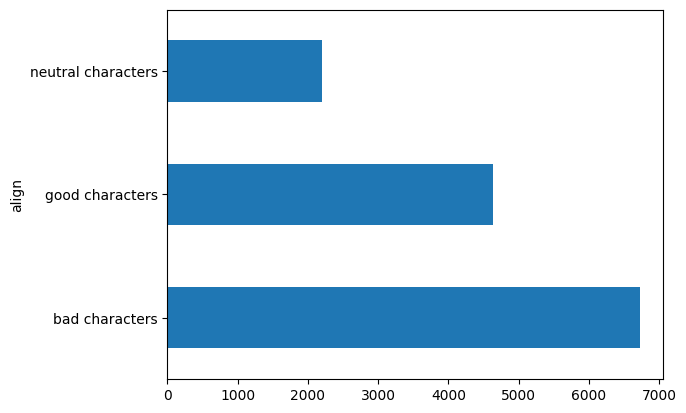

In [114]:
data_marvel.value_counts('align').plot.barh()

In [115]:
data_marvel.value_counts('sex')

sex
male characters           11638
female characters          3837
agender characters           45
genderfluid characters        2
dtype: int64

In [116]:
data_marvel.value_counts('hair')

hair
black hair               3755
brown hair               2339
blond hair               1582
no hair                  1176
bald                      838
white hair                754
red hair                  620
grey hair                 531
green hair                117
auburn hair                78
blue hair                  56
strawberry blond hair      47
purple hair                47
orange hair                43
variable hair              32
pink hair                  31
yellow hair                20
silver hair                16
gold hair                   8
light brown hair            6
reddish blond hair          6
magenta hair                5
orange-brown hair           3
dyed hair                   1
bronze hair                 1
dtype: int64

### Aufgaben:

- Frage: Wie "gut" sind blauäugigen Helden?
- Und wie gut Helden mit schwarzen Haaren? 

<AxesSubplot: ylabel='align'>

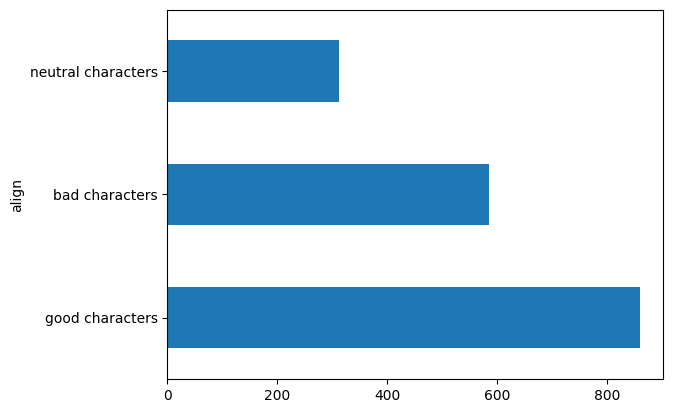

In [120]:
mask = data_marvel['eye'] == 'blue eyes'
data_marvel[mask].value_counts('align').plot.barh()


<AxesSubplot: ylabel='align'>

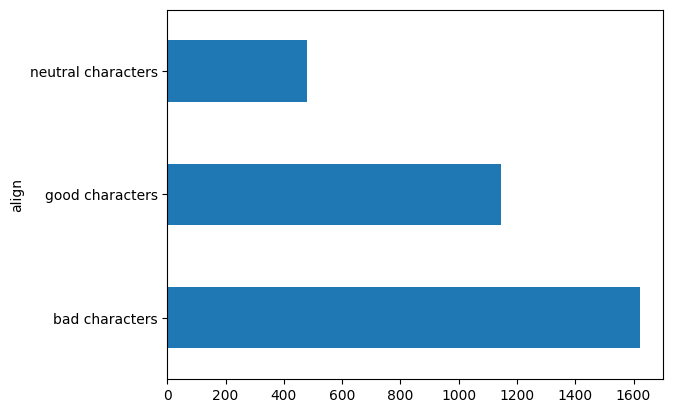

In [121]:
mask= data_marvel['hair'] == "black hair"
data_marvel[mask].value_counts('align').plot.barh()

<AxesSubplot: ylabel='align'>

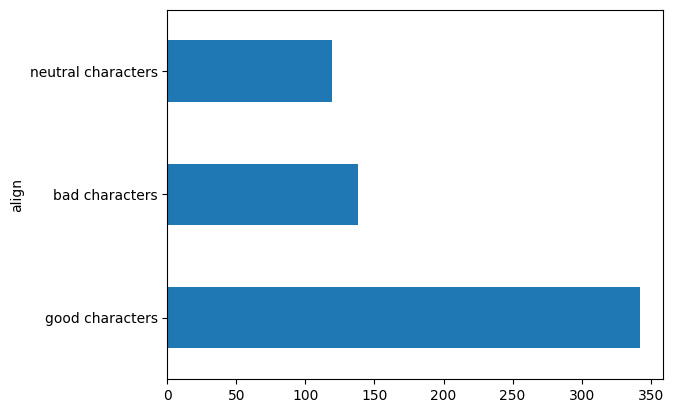

In [124]:
mask = (data_marvel["sex"] == "female characters") & (data_marvel['eye'] == 'blue eyes')
data_marvel[mask].value_counts('align').plot.barh()

### Daten und Zeiten
Daten und Zeiten werden in sehr vielen verschiedenen Formaten und Stilen angegeben. Das macht ein Vergleichen schwer bis unmöglich. Darum müssen solche Einträge häufig vereinheitlicht werden.

Es gibt in Pandas viele Möglichkeiten Daten/Zeiten zu lesen und umzuwandeln. Hier bauen wir aber eine eigene einfache Methode.

In [118]:
data_marvel["first appearance"][:20]

0     aug-62
1     mar-41
2     oct-74
3     mar-63
4     nov-50
5     nov-61
6     nov-61
7     may-62
8     sep-63
9     nov-61
10    sep-63
11    nov-61
12      None
13    may-75
14    sep-64
15    apr-64
16    jul-63
17    jun-65
18    mar-63
19    sep-63
Name: first appearance, dtype: object

### Aufgabe:
- mit `str.split()` die Jahreszahl vom Monat trennen

In [131]:
# define our own conversion function
def str_to_year(input_str):
    if input_str is None:
        return None
    str_split = input_str.split('-')
    if len(str_split) > 1:
        if int(str_split[1]) > 22:
            return 1900 + int(str_split[1])
        return 2000 + int(str_split[1])
    return None
    
data_marvel["first appearance"].apply(str_to_year) #apply wendet die methode auf jeden eintrag auf das pd dataframe an

0        1962.0
1        1941.0
2        1974.0
3        1963.0
4        1950.0
          ...  
16371       NaN
16372       NaN
16373       NaN
16374       NaN
16375       NaN
Name: first appearance, Length: 16376, dtype: float64

In [134]:
data_marvel.loc[:, "first appearance"] = data_marvel["first appearance"].apply(str_to_year)

AttributeError: 'float' object has no attribute 'split'

In [ ]:
data_marvel.head(2)

### Einfache statistische Kennzahlen...
... sagen einiges aus, aber oft nicht genug.

In [137]:
data_marvel["first appearance"].describe()

count    15561.000000
mean      1984.951803
std         19.663571
min       1939.000000
25%       1974.000000
50%       1990.000000
75%       2000.000000
max       2013.000000
Name: first appearance, dtype: float64

### Oft besser: Verteilungen anschauen!

z.b. mit `.plot()`

<AxesSubplot: ylabel='Frequency'>

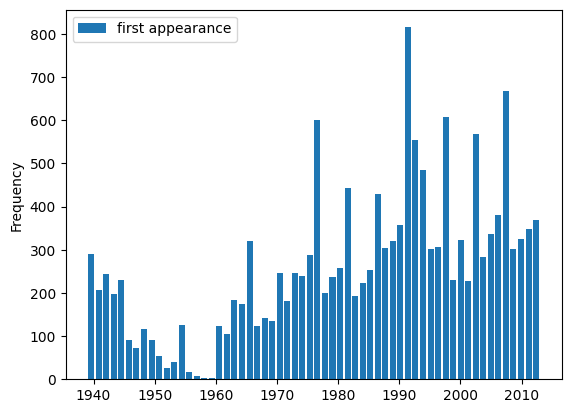

In [145]:
data_marvel.plot(y='first appearance', kind='hist', bins=60, rwidth=0.8)

## Male / Female ratio
- Statt die beiden Diagramme gegeneinander aufzutragen können wir auch das Verhältnis darstellen!
- Dazu nehmen wir die Werte aus dem ausgegebenen Tuple der Methode plt.hist().

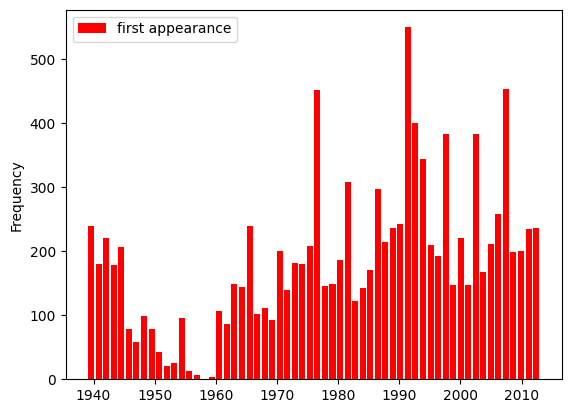

In [158]:
mask_male = data_marvel['sex'] == "male characters"
mask_female = data_marvel['sex'] == "female characters"

hist_data_m = data_marvel[mask_male].plot(y='first appearance', kind='hist', bins=60, rwidth=0.8, color='red')

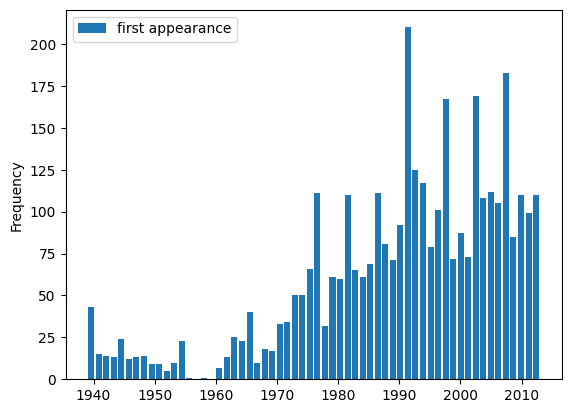

In [159]:
hist_data_f = data_marvel[mask_female].plot(y='first appearance', kind='hist', bins=60, rwidth=0.8)

In [ ]:
# Plot male/female ratio over time
bin_width = hist_data_m[1][1] - hist_data_m[1][0]
x = hist_data[1][:-1] + bin_width/2


fig, ax = plt.subplots(figsize=(10,6))
ax.plot(x, hist_data_m[0]/hist_data[0], "o--")
ax.set_ylabel("no. of male / no. of female heros")

## Marvel vs DC
--> jetzt das gleiche für den DC Datensatz!

In [ ]:
# wieder eine eigene Funktion erstellen

def str_to_year_dc(input_str):
    if input_str is None:
        return None
    str_split = # add your code here
    if len(str_split) > 0:
        return int(str_split[0])
    return None
    
data_dc["first appearance"].apply(str_to_year_dc)

In [ ]:
dc_year = data_dc["first appearance"].apply(str_to_year_dc)
data_dc.loc[:, "first appearance"] = dc_year

In [ ]:
data_dc.head(2)

In [ ]:
data_dc[hero_female]["first appearance"].head()

In [ ]:
hero_male = (data_dc["sex"] == "male characters")
hero_female = (data_dc["sex"] == "female characters")

hist_data_dc = plt.hist(data_dc[hero_female]["first appearance"],
                          bins=n_bins)
hist_data_dc_m = plt.hist(data_dc[hero_male]["first appearance"],
                          bins=n_bins)

In [ ]:
hist_data_dc

In [ ]:
# Plot both
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(hist_data_m[0]/hist_data[0], "o--", label="Marvel")
ax.set_ylabel("no. of male / no. of female heros")

ax.plot(hist_data_dc_m[0]/hist_data_dc[0], "o--", label="DC")
ax.set_ylabel("no. of male / no. of female heros")
plt.legend()
plt.ylim(0)
plt.xticks(ticks=np.arange(0,7), labels=[f"{int(x)}-{int(x+10)}" for x in hist_data[1][:-1]])
plt.axhline(1, color="teal")  # nur als Vergleichslinie!
plt.title("Male:Female superheros (Marvel vs. DC)")